<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day2_pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

# 데이터 load
dataset = np.loadtxt("/content/drive/My Drive/Colab Notebooks/diabetes.csv", delimiter=",")


In [ ]:
데이터셋 생성하기 - 입력(속성값 8개)와 출력(판정결과 1개)변수로 분리

In [ ]:
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

모델 구성하기

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


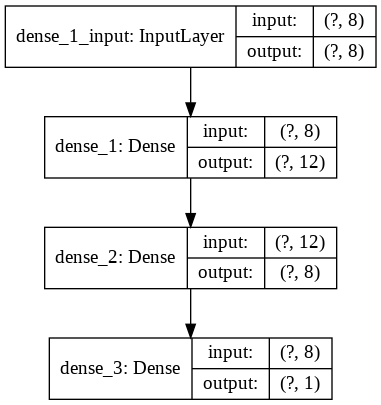

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습과정 설정하기

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


모델 학습시키기

In [ ]:
history =  model.fit(x_train, y_train, epochs=1500, batch_size=64)


Epoch 1/1500
700/700 [==============================] - 0s 553us/step - loss: 10.5215 - accuracy: 0.6557
Epoch 2/1500
700/700 [==============================] - 0s 29us/step - loss: 8.3001 - accuracy: 0.6471
Epoch 3/1500
700/700 [==============================] - 0s 30us/step - loss: 6.7163 - accuracy: 0.6157
Epoch 4/1500
700/700 [==============================] - 0s 29us/step - loss: 5.1754 - accuracy: 0.6371
Epoch 5/1500
700/700 [==============================] - 0s 25us/step - loss: 3.8884 - accuracy: 0.6557
Epoch 6/1500
700/700 [==============================] - 0s 29us/step - loss: 2.8820 - accuracy: 0.6286
Epoch 7/1500
700/700 [==============================] - 0s 30us/step - loss: 2.2346 - accuracy: 0.5800
Epoch 8/1500
700/700 [==============================] - 0s 35us/step - loss: 1.9465 - accuracy: 0.5600
Epoch 9/1500
700/700 [==============================] - 0s 32us/step - loss: 1.7355 - accuracy: 0.5743
Epoch 10/1500
700/700 [==============================] - 0s 30us/step -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

학습 결과 그려보기

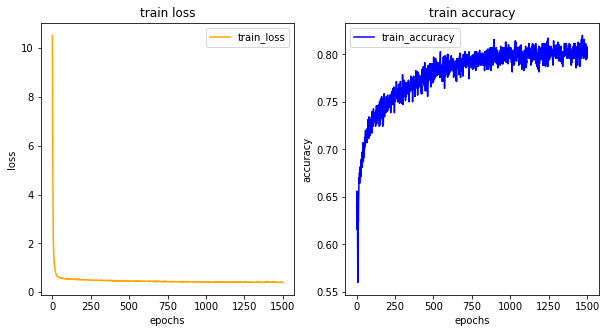

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


모델 평가하기

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


68/68 [==============================] - 0s 99us/step
accuracy: 80.88%
